# Reinforcement Learning - Assignment 1 - Final Submission

In [ ]:
'''
I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work.
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random

## PART 1 - Defining RL Environments

## Deterministic Environment

In [2]:
class DeterministicEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 5

  def reset(self):
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.mine_pos = [0, 3]
    self.bomb_pos = [3, 1]
    self.gem_pos = [1, 2]
    self.potion_pos = [2, 0]

    self.state = np.zeros((4, 4))
    self.state[tuple(self.goal_pos)] = 100
    self.state[tuple(self.mine_pos)] = 200
    self.state[tuple(self.bomb_pos)] = 255
    self.state[tuple(self.gem_pos)] = 185
    self.state[tuple(self.potion_pos)] = 80
    self.state[tuple(self.agent_pos)] = 50
    
    if (self.agent_pos == np.array([0, 0])).all():
        observation = 0
    if (self.agent_pos == np.array([0, 1])).all():
        observation = 1
    if (self.agent_pos == np.array([0, 2])).all():
        observation = 2
    if (self.agent_pos == np.array([0, 3])).all():
        observation = 3
    if (self.agent_pos == np.array([1, 0])).all():
        observation = 4
    if (self.agent_pos == np.array([1, 1])).all():
        observation = 5
    if (self.agent_pos == np.array([1, 2])).all():
        observation = 6
    if (self.agent_pos == np.array([1, 3])).all():
        observation = 7
    if (self.agent_pos == np.array([2, 0])).all():
        observation = 8
    if (self.agent_pos == np.array([2, 1])).all():
        observation = 9
    if (self.agent_pos == np.array([2, 2])).all():
        observation = 10
    if (self.agent_pos == np.array([2, 3])).all():
        observation = 11
    if (self.agent_pos == np.array([3, 0])).all():
        observation = 12
    if (self.agent_pos == np.array([3, 1])).all():
        observation = 13
    if (self.agent_pos == np.array([3, 2])).all():
        observation = 14
    if (self.agent_pos == np.array([3, 3])).all():
        observation = 15

    return observation

  def step(self, action):
    
    # The agent will move DOWN
    if action == 0:
        self.agent_pos[0] -= 1
    
    # The agent will move UP
    if action == 1:
        self.agent_pos[0] += 1
    
    # The agent will move RIGHT
    if action == 2:
        self.agent_pos[1] -= 1
    
    # The agent will move LEFT
    if action == 3:
        self.agent_pos[1] += 1
    
    # Ensuring that the agent stays within the bounds
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.state = np.zeros((4,4))
    self.state[tuple(self.goal_pos)] = 100
    self.state[tuple(self.mine_pos)] = 65
    self.state[tuple(self.bomb_pos)] = 255
    self.state[tuple(self.gem_pos)] = 130
    self.state[tuple(self.potion_pos)] = 50
    self.state[tuple(self.agent_pos)] = 20

    if (self.agent_pos == np.array([0, 0])).all():
        observation = 0
    if (self.agent_pos == np.array([0, 1])).all():
        observation = 1
    if (self.agent_pos == np.array([0, 2])).all():
        observation = 2
    if (self.agent_pos == np.array([0, 3])).all():
        observation = 3
    if (self.agent_pos == np.array([1, 0])).all():
        observation = 4
    if (self.agent_pos == np.array([1, 1])).all():
        observation = 5
    if (self.agent_pos == np.array([1, 2])).all():
        observation = 6
    if (self.agent_pos == np.array([1, 3])).all():
        observation = 7
    if (self.agent_pos == np.array([2, 0])).all():
        observation = 8
    if (self.agent_pos == np.array([2, 1])).all():
        observation = 9
    if (self.agent_pos == np.array([2, 2])).all():
        observation = 10
    if (self.agent_pos == np.array([2, 3])).all():
        observation = 11
    if (self.agent_pos == np.array([3, 0])).all():
        observation = 12
    if (self.agent_pos == np.array([3, 1])).all():
        observation = 13
    if (self.agent_pos == np.array([3, 2])).all():
        observation = 14
    if (self.agent_pos == np.array([3, 3])).all():
        observation = 15

    reward = 0
    if (self.agent_pos == self.goal_pos).all():
        reward = 10
    
    if (self.agent_pos == self.mine_pos).all():
        reward = -1
    
    if (self.agent_pos == self.bomb_pos).all():
        reward = -5
    
    if (self.agent_pos == self.gem_pos).all():
        reward = 3
    
    if (self.agent_pos == self.potion_pos).all():
        reward = 1
        
    self.timestep += 1
    done = True if (self.timestep >= self.max_timesteps or reward == 10) else False
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)
    plt.show()

## Stochastic Environment

In [3]:
class StochasticEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 5

  def reset(self):
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.mine_pos = [0, 3]
    self.bomb_pos = [3, 1]
    self.gem_pos = [1, 2]
    self.potion_pos = [2, 0]

    self.state = np.zeros((4, 4))
    self.state[tuple(self.goal_pos)] = 100
    self.state[tuple(self.mine_pos)] = 65
    self.state[tuple(self.bomb_pos)] = 255
    self.state[tuple(self.gem_pos)] = 130
    self.state[tuple(self.potion_pos)] = 50
    self.state[tuple(self.agent_pos)] = 20

    #observation = self.state.flatten()
    if (self.agent_pos == np.array([0, 0])).all():
        observation = 0
    if (self.agent_pos == np.array([0, 1])).all():
        observation = 1
    if (self.agent_pos == np.array([0, 2])).all():
        observation = 2
    if (self.agent_pos == np.array([0, 3])).all():
        observation = 3
    if (self.agent_pos == np.array([1, 0])).all():
        observation = 4
    if (self.agent_pos == np.array([1, 1])).all():
        observation = 5
    if (self.agent_pos == np.array([1, 2])).all():
        observation = 6
    if (self.agent_pos == np.array([1, 3])).all():
        observation = 7
    if (self.agent_pos == np.array([2, 0])).all():
        observation = 8
    if (self.agent_pos == np.array([2, 1])).all():
        observation = 9
    if (self.agent_pos == np.array([2, 2])).all():
        observation = 10
    if (self.agent_pos == np.array([2, 3])).all():
        observation = 11
    if (self.agent_pos == np.array([3, 0])).all():
        observation = 12
    if (self.agent_pos == np.array([3, 1])).all():
        observation = 13
    if (self.agent_pos == np.array([3, 2])).all():
        observation = 14
    if (self.agent_pos == np.array([3, 3])).all():
        observation = 15

    return observation

  def step(self, action):
    
    # The agent will move DOWN
    if action == 0:
        self.agent_pos[0] -= 1
    
    # The agent will move UP
    if action == 1:
        self.agent_pos[0] += 1
    
    # The agent will move RIGHT
    if action == 2:
        self.agent_pos[1] -= 1
    
    # The agent will move LEFT
    if action == 3:
        self.agent_pos[1] += 1
    
    # Ensuring that the agent stays within the bounds
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.state = np.zeros((4,4))
    self.state[tuple(self.goal_pos)] = 100
    self.state[tuple(self.mine_pos)] = 65
    self.state[tuple(self.bomb_pos)] = 255
    self.state[tuple(self.gem_pos)] = 130
    self.state[tuple(self.potion_pos)] = 50
    self.state[tuple(self.agent_pos)] = 20

    #observation = self.state.flatten()
    if (self.agent_pos == np.array([0, 0])).all():
        observation = 0
    if (self.agent_pos == np.array([0, 1])).all():
        observation = 1
    if (self.agent_pos == np.array([0, 2])).all():
        observation = 2
    if (self.agent_pos == np.array([0, 3])).all():
        observation = 3
    if (self.agent_pos == np.array([1, 0])).all():
        observation = 4
    if (self.agent_pos == np.array([1, 1])).all():
        observation = 5
    if (self.agent_pos == np.array([1, 2])).all():
        observation = 6
    if (self.agent_pos == np.array([1, 3])).all():
        observation = 7
    if (self.agent_pos == np.array([2, 0])).all():
        observation = 8
    if (self.agent_pos == np.array([2, 1])).all():
        observation = 9
    if (self.agent_pos == np.array([2, 2])).all():
        observation = 10
    if (self.agent_pos == np.array([2, 3])).all():
        observation = 11
    if (self.agent_pos == np.array([3, 0])).all():
        observation = 12
    if (self.agent_pos == np.array([3, 1])).all():
        observation = 13
    if (self.agent_pos == np.array([3, 2])).all():
        observation = 14
    if (self.agent_pos == np.array([3, 3])).all():
        observation = 15

    reward = 0
    if (self.agent_pos == self.goal_pos).all():
        reward = 10
    
    # The reward for the mine is stochastic. It is -1, 90% of the time and 0, 10% of the time
    if (self.agent_pos == self.mine_pos).all():
        if random.random() < 0.9:
            reward = -1
        else:
            reward = 0
    if (self.agent_pos == self.bomb_pos).all():
        reward = -5
    
    if (self.agent_pos == self.gem_pos).all():
        reward = 3
    
    # The reward for the potion is stochastic. It is +1, 90% of the time and +3, 10% of the time
    if (self.agent_pos == self.potion_pos).all():
        if random.random() < 0.9:
            reward = 1
        else:
            reward = 3
    
    self.timestep += 1
    done = True if (self.timestep >= self.max_timesteps or reward == 10) else False
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)
    plt.show()

## PART 2 - Applying Tabular Methods

## Q-Learning Algorithm

In [26]:
# Implementing Q-Learning Algorithm
class QLearning:

    def __init__(self, environment):

        # Creating the Q-table 
        self.environment = environment
        self.action_size = environment.action_space.n
        self.state_size = environment.observation_space.n
        self.q_table = np.zeros((self.state_size, self.action_size))  # Size of Q-table is set to state_size x action_size
        self.reward_list_train = []
        self.epsilon_decay = []
        self.reward_list_eval = []

    def train(self):
                
        # Initializing hyper-parameters
        learning_rate = 0.95                                           # Learning rate 
        gamma = 0.85                                                   # Discounting rate
        total_episodes = 100                                           # Total no. of episodes until the end
        max_steps_per_episode = 20                                     # Maximum steps allowed per episode

        # Exploration parameters
        epsilon = 1.0                                                 # Exploration rate
        max_epsilon = 1.0                                             # Maximum limit of exploration
        min_epsilon = 0.01                                            # Minimum limit of exploration 
        decay_rate = 0.05                                             # Decay rate of exploration
        
        
        for ep in range(total_episodes):
            state = self.environment.reset()

            #step = 0
            done = False
            current_ep_rewards = 0

            for step in range(max_steps_per_episode):
                
                # A random threshold is set as trade-off between exploration and exploitation
                exp_exp_rate_threshold = random.uniform(0, 1)

                # If this threshold > epsilon value --> EXPLOITATION (greedy action) (by choosing the biggest Q value for this state)
                if exp_exp_rate_threshold > epsilon:
                    action = np.argmax(self.q_table[state,:])

                # Else a random action is picked Up/Down/Left/Right) --> EXPLORATION
                else:
                    action = self.environment.action_space.sample()

                # Action (a) is taken and the next state(s[t+1]) and reward (r) are observed
                new_state, reward, done, info = self.environment.step(action)
                               
                # Q-table is upated using the formula:  Q(s,a):= (1 - lr)Q(s,a) + lr [R(s,a) + gamma * max Q(s[t+1],a[t+1])]
                self.q_table[state, action] = ((1 - learning_rate) * self.q_table[state, action]) + learning_rate * (reward + gamma * np.max(self.q_table[new_state, :]))
                current_ep_rewards += reward

                # Updating state variable with the new state
                state = new_state

                # finish episode
                if done == True: 
                    break

            # Epsilon is decayed to encourage less exploration and more exploitation based on the updated Q-table values
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*ep) 
            self.epsilon_decay.append(epsilon)
            self.reward_list_train.append(current_ep_rewards)
            
        # Avg. reward per 10 episodes is calculated 
        ep_count = 10
        count = ep_count
        rewards_in_sets = np.split(np.array(self.reward_list_train), total_episodes/ep_count)
        
        print("Average reward per ", ep_count, "episodes:")
        for r in rewards_in_sets:
            print(count, ":", str(sum(r/ep_count)))
            count += ep_count
            

    def evaluate(self):

        self.environment.train = False
        self.environment.reset()
        max_steps_per_episode = 20

        for ep in range(10):
            state = self.environment.reset()
            step = 0
            done = False
            cummulative_reward = 0
            
            for step in range(max_steps_per_episode):
                
                # Action with the most expected future cummulative reward (given that state) is taken
                action = np.argmax(self.q_table[state,:])

                new_state, reward, done, info = self.environment.step(action)
                state = new_state
                cummulative_reward += reward
            print("Reward for episode - ",ep," : ", cummulative_reward)
            self.reward_list_eval.append(cummulative_reward)

        # Final reward value is printed
        print("reward list:", self.reward_list_eval)
        self.environment.close()
        

    def plot(self,):
        
        self.environment.render() 
        
        # Plotting Epsilon Decay plot
        plt.figure(figsize=(15, 10))
        plt.plot(self.epsilon_decay, color='lightcoral', linewidth=)
        plt.xlabel('Episodes', fontsize=32)
        plt.ylabel('Epsilon Value', fontsize=32)
        plt.title('Epsilon Decay Plot', fontsize=38)
        plt.grid()
        plt.show()

        # Plotting Rewards Vs Episodes
        x = []
        for e in range(1,len(self.reward_list_train)+1):
            x.append(e)
            
        plt.figure(figsize=(15, 10))
        #plt.scatter(x, self.reward_list_train, color='mediumorchid', s=30)
        plt.plot(self.reward_list_train, label = "Q-Learning Method", color='mediumorchid')
        plt.xlabel('Episodes', fontsize=32)
        plt.ylabel('Rewards', fontsize=32)
        plt.title('Total Reward over Episodes during training', fontsize=38)
        plt.grid()
        plt.show()
        
        print("Q-Table:\n", self.q_table)
        return self.reward_list_eval

SyntaxError: invalid syntax (temp/ipykernel_35844/3474133351.py, line 114)

Average reward per  10 episodes:
10 : 1.3000000000000003
20 : 2.5
30 : 3.3999999999999995
40 : 3.1
50 : 3.9999999999999996
60 : 3.9999999999999996
70 : 3.8999999999999995
80 : 3.9999999999999996
90 : 3.9999999999999996
100 : 3.9999999999999996
Reward for episode -  0  :  19
Reward for episode -  1  :  19
Reward for episode -  2  :  19
Reward for episode -  3  :  19
Reward for episode -  4  :  19
Reward for episode -  5  :  19
Reward for episode -  6  :  19
Reward for episode -  7  :  19
Reward for episode -  8  :  19
Reward for episode -  9  :  19
reward list: [19, 19, 19, 19, 19, 19, 19, 19, 19, 19]


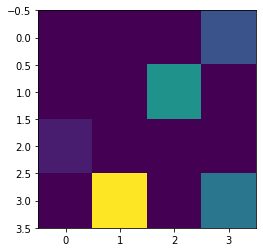

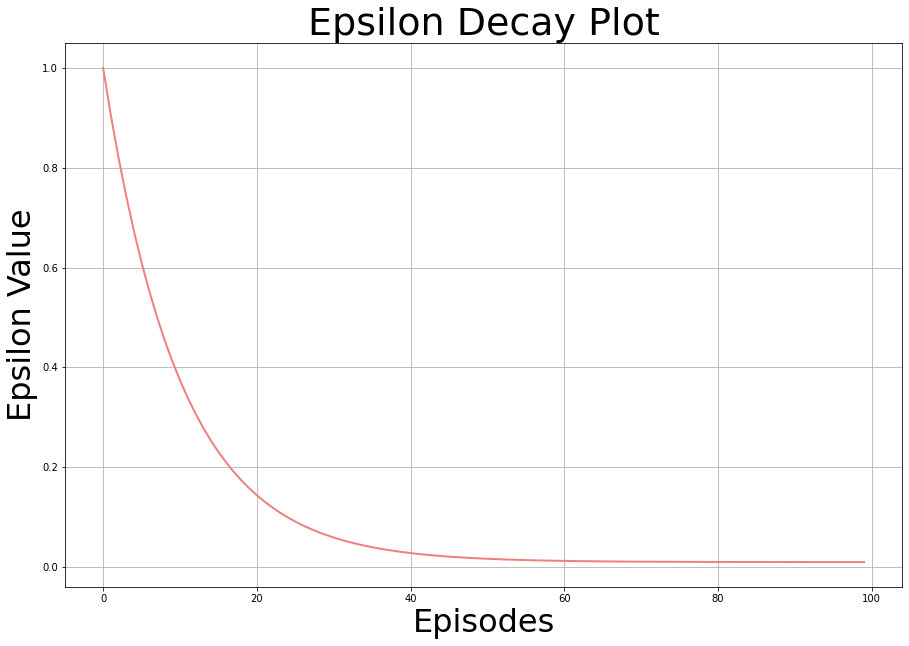

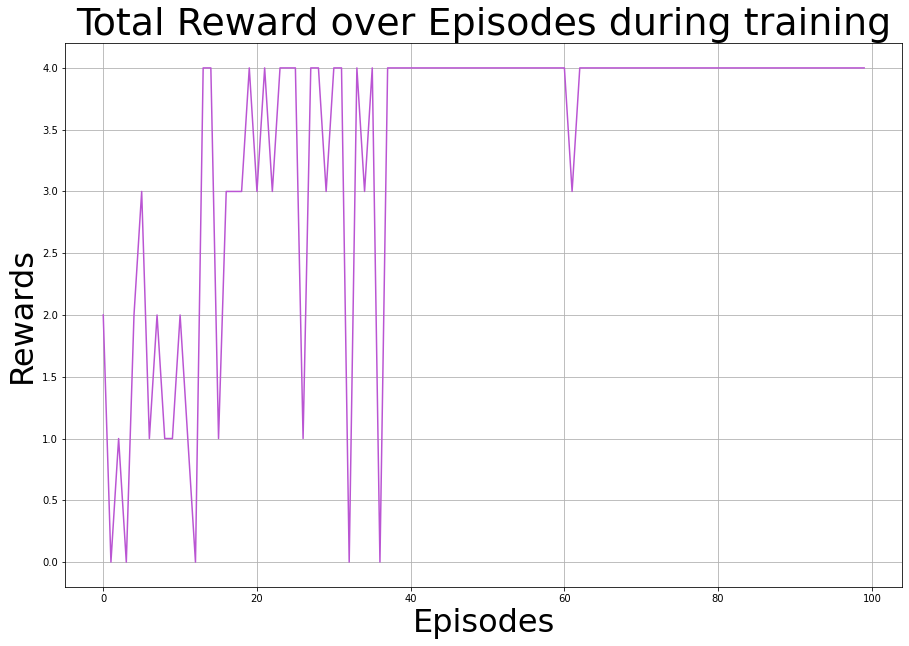

Q-Table:
 [[3.17188247 5.66666667 4.51236497 0.        ]
 [0.52521908 0.44532013 4.80487454 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [2.52788786 6.66666667 2.945353   0.46981804]
 [3.7455883  0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [5.08852331 5.41247293 6.66666667 0.36045219]
 [0.44638042 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [6.65183254 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Average reward per  10 episodes:
10 : 2.1
20 : 2.9
30 : 4.7
40 : 5.3999999999999995
50 : 5.999999999999999
60 : 5.999999999999999
70 : 5.999999999999999
80 : 5.999999999999999
90 : 5.699999999999999
100 : 5.699999999999999
Reward for epi

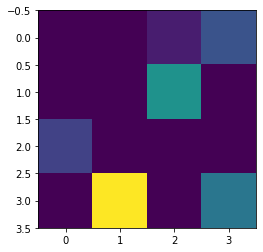

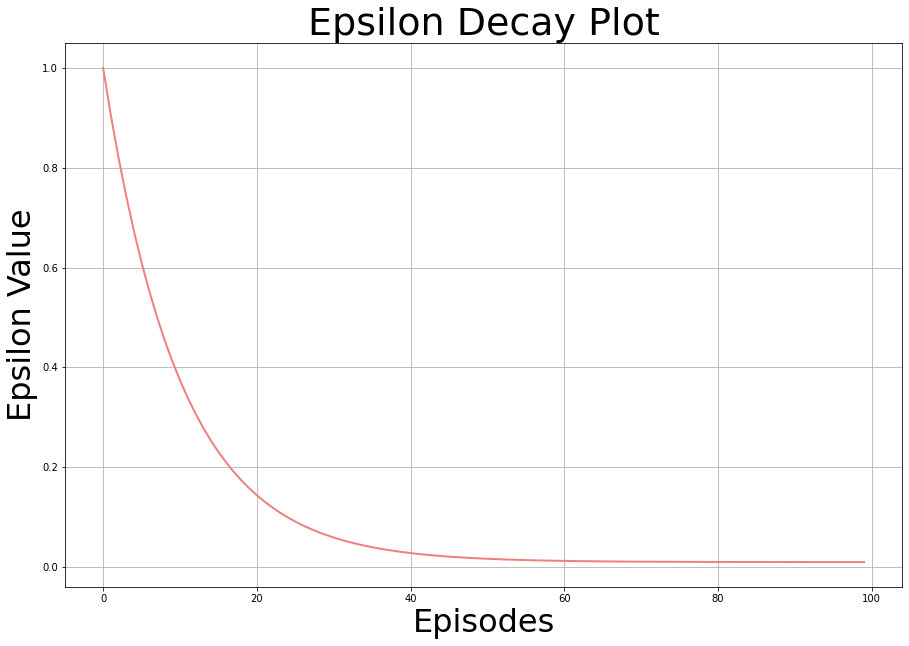

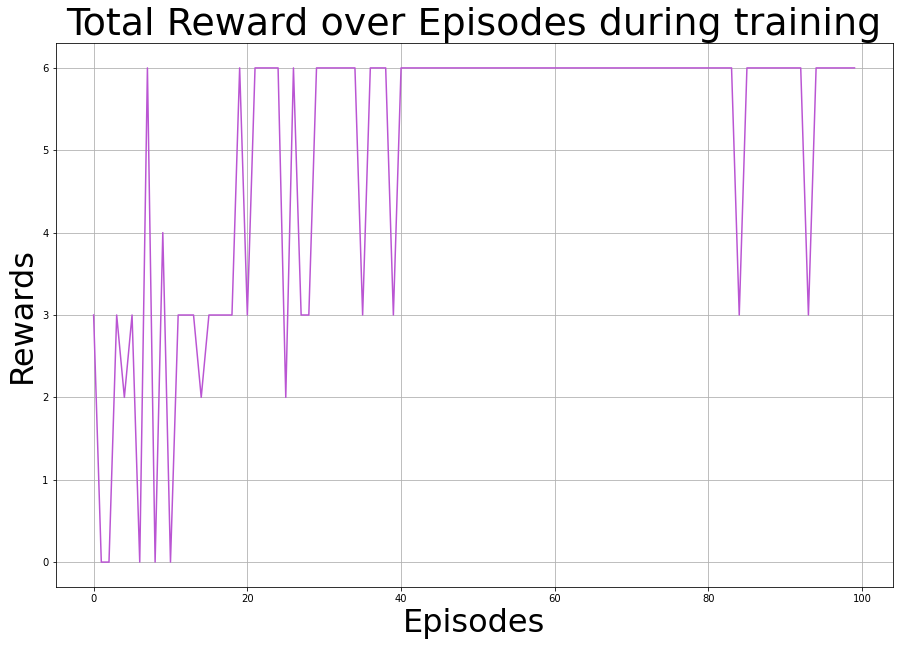

Q-Table:
 [[ 6.18016445  2.63702969  1.83757557  7.81081081]
 [ 7.70822976  3.56230943  6.39193845  9.18918919]
 [ 8.06395193 10.81081081  7.81019573  1.09646724]
 [ 0.          0.          2.41644375  0.        ]
 [ 4.36269788  5.02623968  0.          0.        ]
 [ 5.38835391  0.          0.          0.        ]
 [ 9.18918919  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.18378657  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [25]:
deterministic_environment = DeterministicEnvironment()
agent = QLearning(deterministic_environment)
agent.train()
agent.evaluate()
d_list_qlearn = agent.plot()

stochastic_environment = StochasticEnvironment()
agent = QLearning(stochastic_environment)
agent.train()
agent.evaluate()
s_list_qlearn = agent.plot()

## SARSA Algorithm

In [27]:
# Implementing SARSA
class SARSA:

    def __init__(self, environment):

        # Creating the Q-table 
        self.environment = environment
        self.action_size = environment.action_space.n
        self.state_size = environment.observation_space.n
        self.q_table = np.zeros((self.state_size, self.action_size))  # Size of Q-table is set to state_size x action_size
        self.reward_list_train = []
        self.epsilon_decay = []
        self.reward_list_eval = []

        
    def train(self):
                
        # Initializing hyper-parameters
        learning_rate = 0.1                                          # Learning rate 
        gamma = 0.85                                                  # Discounting rate
        total_episodes = 100                                          # Total no. of episodes until the end
        max_steps_per_episode = 20                                    # Maximum steps allowed per episode

        # Exploration parameters
        epsilon = 1.0                                                 # Exploration rate
        max_epsilon = 1.0                                             # Maximum limit of exploration
        min_epsilon = 0.01                                            # Minimum limit of exploration 
        decay_rate = 0.05                                             # Exponential decay rate of exploration
        
        
        for ep in range(total_episodes):
            state = self.environment.reset()

            #step = 0
            done = False
            current_ep_rewards = 0

            for step in range(max_steps_per_episode):
                
                # A random threshold is set as trade-off between exploration and exploitation
                exp_exp_rate_threshold = random.uniform(0, 1)

                # If this threshold > epsilon value --> EXPLOITATION (greedy action)
                if exp_exp_rate_threshold > epsilon:
                    action = np.argmax(self.q_table[state,:])

                # Else a random action is picked (Up/Down/Left/Right) --> EXPLORATION
                else:
                    action = self.environment.action_space.sample()

                # Action (a) is taken and the outcome state(s[t+1]) and reward (r) are observed
                new_state, reward, done, info = self.environment.step(action)
                
                # Choosing a new action for the new state
                if exp_exp_rate_threshold > epsilon:
                    new_action = np.argmax(self.q_table[new_state,:])

                # Else a random action is picked (Up/Down/Left/Right) --> EXPLORATION (greedy action)
                else:
                    new_action = self.environment.action_space.sample()
                
                # Update Q-table values using the formula:  Q(s,a):= (1 - lr)Q(s,a) + lr [R(s,a) + gamma * max Q(s[t+1],a[t+1])]
                self.q_table[state, action] = ((1 - learning_rate) * self.q_table[state, action]) + learning_rate * (reward + gamma * self.q_table[new_state, new_action])
                current_ep_rewards += reward

                # Updating state variable with the new state
                state = new_state
                action = new_action
                
                # finish episode
                if done == True: 
                    break

            # Epsilon is decayed to encourage less exploration and more exploitation based on the updated Q-table values
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*ep) 
            self.epsilon_decay.append(epsilon)
            self.reward_list_train.append(current_ep_rewards)
            
        # Avg. reward per 10 episodes is calculated
        ep_count = 10
        count = ep_count
        rewards_in_sets = np.split(np.array(self.reward_list_train), total_episodes/ep_count)
        
        print("Average reward per ", ep_count, "episodes:")
        for r in rewards_in_sets:
            print(count, ":", str(sum(r/ep_count)))
            count += ep_count
            

    def evaluate(self):

        self.environment.train = False
        self.environment.reset()
        max_steps_per_episode = 20

        for ep in range(10):
            state = self.environment.reset()
            step = 0
            done = False
            cummulative_reward = 0
            
            for step in range(max_steps_per_episode):
                
                # Action with the most expected future cummulative reward (given that state) is taken
                action = np.argmax(self.q_table[state,:])

                new_state, reward, done, info = self.environment.step(action)
                state = new_state
                cummulative_reward += reward
            print("Reward for episode - ",ep," : ", cummulative_reward)
            self.reward_list_eval.append(cummulative_reward)

        # Final reward value is printed
        print("reward list:", self.reward_list_eval)
        self.environment.close()
        

    def plot(self,):
        
        self.environment.render() 
        
        # Plotting Epsilon Decay plot
        plt.figure(figsize=(15, 10))
        plt.plot(self.epsilon_decay, color='lightcoral', linewidth=2)
        plt.xlabel('Episodes', fontsize=32)
        plt.ylabel('Epsilon Value', fontsize=32)
        plt.title('Epsilon Decay Plot', fontsize=38)
        plt.grid()
        plt.show()

        # Plotting Rewards Vs Episodes
        x = []
        for e in range(1,len(self.reward_list_train)+1):
            x.append(e)
            
        plt.figure(figsize=(15, 10))
        plt.plot(self.reward_list_train, label = "SARSA Method", color='mediumorchid')
        plt.xlabel('Episodes', fontsize=32)
        plt.ylabel('Rewards', fontsize=32)
        plt.title('Total Reward over Episodes during training', fontsize=38)
        plt.grid()
        plt.show()
        
        print("Q-Table:\n", self.q_table)
        return self.reward_list_eval

Average reward per  10 episodes:
10 : 0.3
20 : 3.4000000000000004
30 : 2.2
40 : 4.199999999999999
50 : 5.699999999999999
60 : 4.999999999999999
70 : 5.999999999999999
80 : 5.699999999999999
90 : 5.3999999999999995
100 : 5.999999999999999
Reward for episode -  0  :  27
Reward for episode -  1  :  27
Reward for episode -  2  :  27
Reward for episode -  3  :  27
Reward for episode -  4  :  27
Reward for episode -  5  :  27
Reward for episode -  6  :  27
Reward for episode -  7  :  27
Reward for episode -  8  :  27
Reward for episode -  9  :  27
reward list: [27, 27, 27, 27, 27, 27, 27, 27, 27, 27]


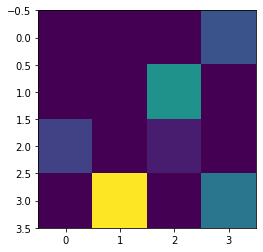

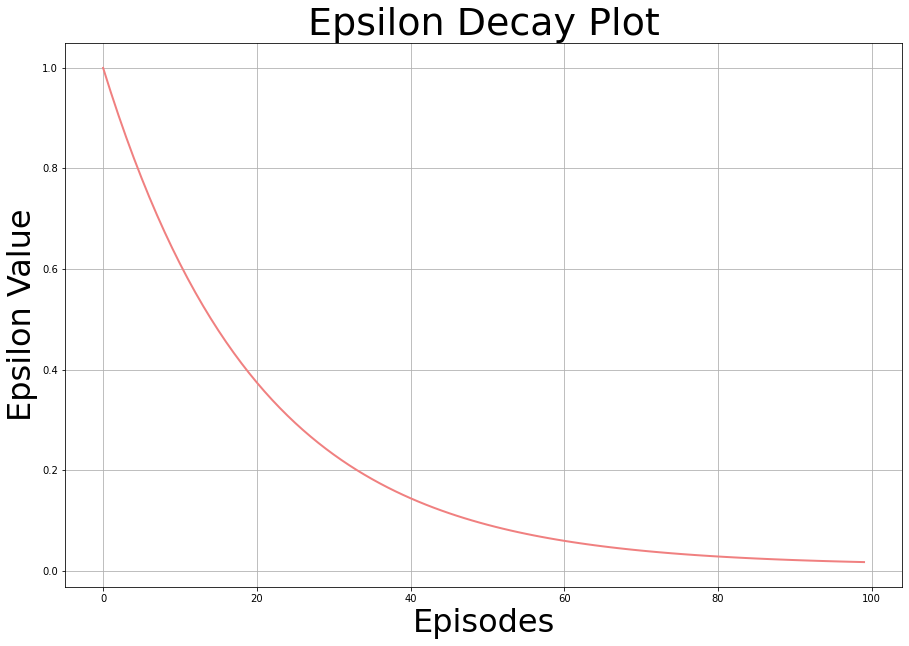

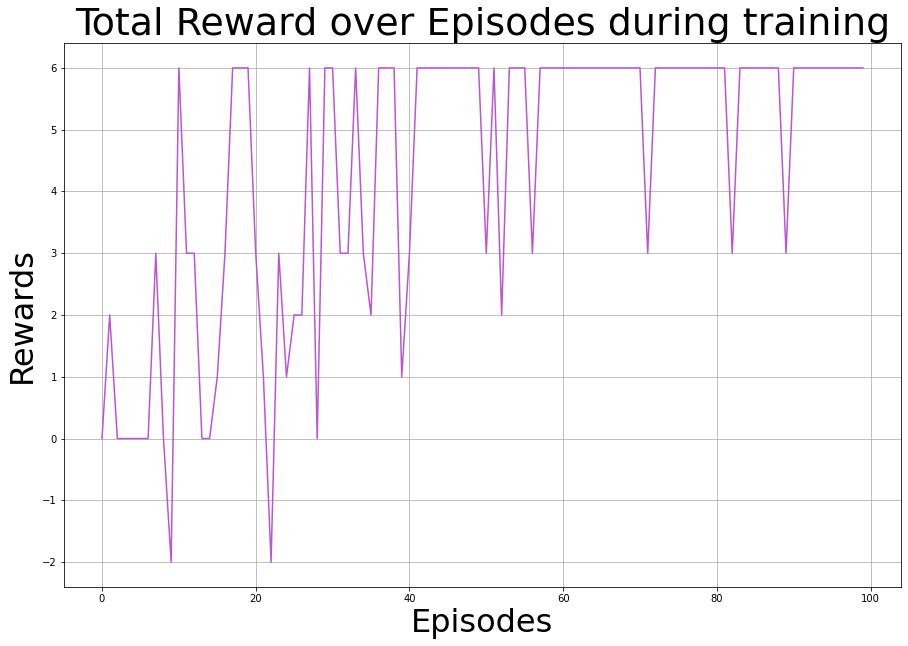

Q-Table:
 [[ 0.00000000e+00  0.00000000e+00  2.56522277e-01  3.95010437e+00]
 [ 0.00000000e+00  5.24156917e+00  0.00000000e+00 -1.37275000e-03]
 [-8.50000000e-03  0.00000000e+00  4.89097977e-01 -2.71000000e-01]
 [-1.90000000e-01  2.55000000e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  6.40188602e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.87487443e+00]
 [-4.44550000e-02  5.12444264e+00  0.00000000e+00  1.23093777e-01]
 [-1.00000000e-01  0.00000000e+00  1.40546801e+00  0.00000000e+00]
 [ 1.45084107e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.91613989e-01  0.00000000e+00  1.13702388e-01  0.00000000e+00]
 [ 6.76133800e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0

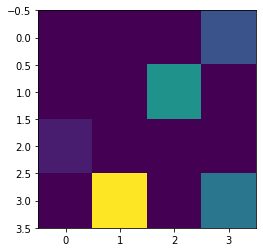

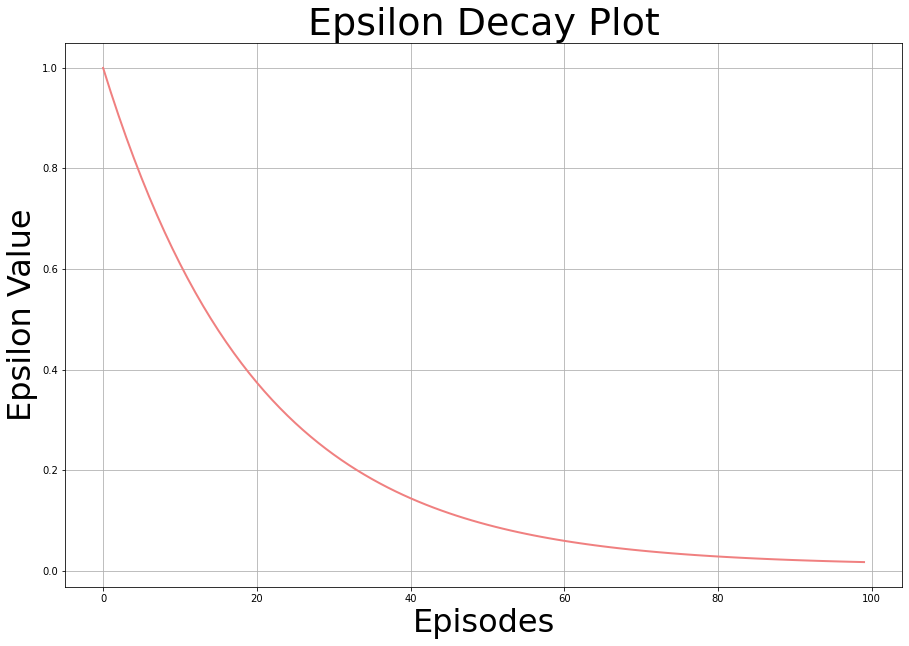

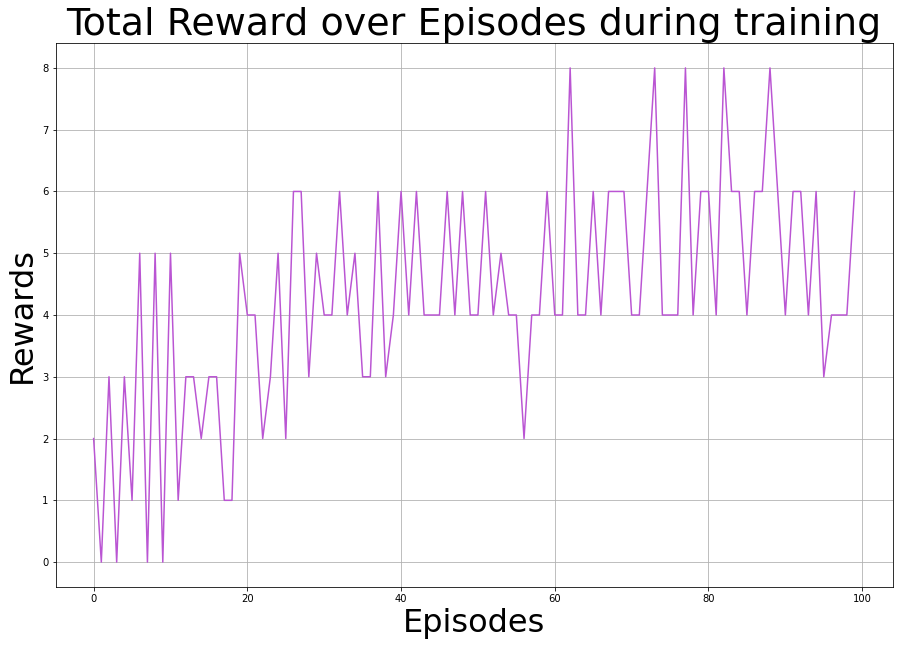

Q-Table:
 [[1.08096624e-03 5.99112149e+00 9.05689787e-03 3.07838472e-02]
 [0.00000000e+00 4.28629078e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05034004e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.73305615e-02 7.68549087e+00 2.13951275e-01 1.19956577e-01]
 [0.00000000e+00 0.00000000e+00 6.24624413e-03 1.96886132e+00]
 [1.34213824e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00059009e-01 8.50991642e-02 7.61559713e+00 1.47261121e-02]
 [4.57975785e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.02167500e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.65170520e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+0

In [28]:
deterministic_environment = DeterministicEnvironment()
agent = SARSA(deterministic_environment)
agent.train()
agent.evaluate()
d_list_sarsa = agent.plot()

stochastic_environment = StochasticEnvironment()
agent = SARSA(stochastic_environment)
agent.train()
agent.evaluate()
s_list_sarsa = agent.plot()

### Comparing results between SARSA and Q-Learning in the deterministic environment

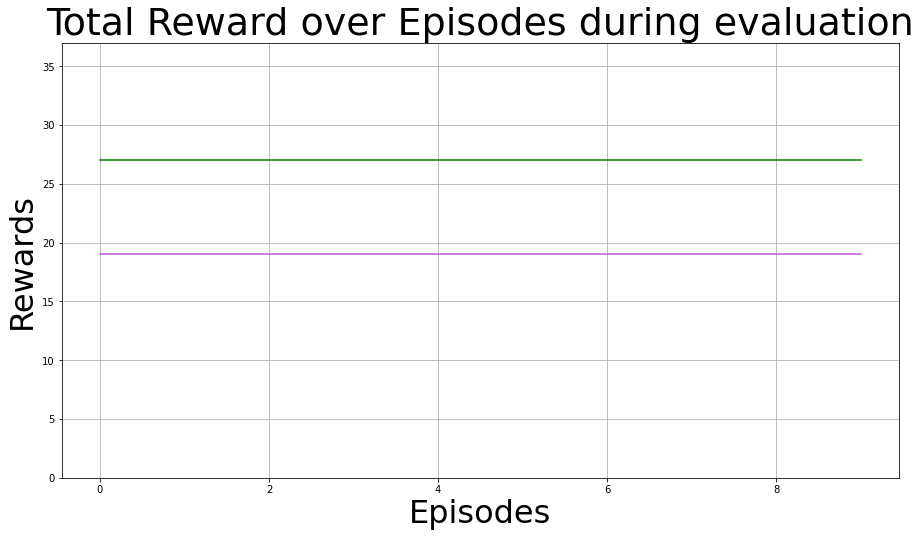

In [8]:
plt.figure(figsize=(15, 8))
plt.ylim([0, max(max(d_list_sarsa), max(d_list_qlearn)+10)])
plt.plot(d_list_sarsa, label = "SARSA", color='mediumorchid')
plt.plot(d_list_qlearn, label = "Q-Learning", color='g')
plt.xlabel('Episodes', fontsize=32)
plt.ylabel('Rewards', fontsize=32)
plt.title('Total Reward over Episodes during evaluation', fontsize=38)
plt.grid()
plt.show()

## Comparing results between SARSA and Q-Learning in the stochastic environment

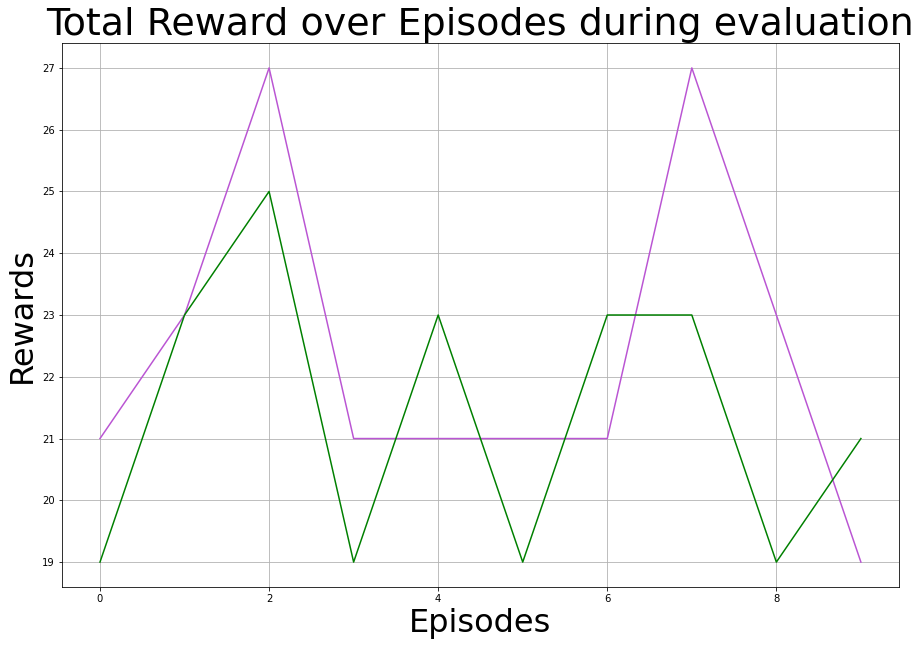

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(s_list_sarsa, label = "SARSA", color='mediumorchid')
plt.plot(s_list_qlearn, label = "Q-Learning", color='g')
plt.xlabel('Episodes', fontsize=32)
plt.ylabel('Rewards', fontsize=32)
plt.title('Total Reward over Episodes during evaluation', fontsize=38)
plt.grid()
plt.show()